# Imports

In [2]:
import os
import warnings
import datetime

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.colors as colors

SuppressWarnings = True
SuppressPlots = False

## Suppress Warnings
if SuppressWarnings:
    warnings.filterwarnings("ignore")
if SuppressPlots:
    import matplotlib
    matplotlib.use("Agg")
    
print(datetime.datetime.ctime(datetime.datetime.today()))
print("Matplotlib: ", mpl.__version__)
print("Numpy     : ", np.__version__)
print("Pandas   : ", pd.__version__)
print("Xarray   : ", xr.__version__)

Thu Sep 28 16:39:04 2023
Matplotlib:  3.7.0
Numpy     :  1.23.5
Pandas   :  1.5.2
Xarray   :  2022.11.0


# Functions

In [4]:
def plot(X, Y, Z, title):
    
    # Create a figure with specified size
    fig = plt.figure(figsize=(11, 6.5))

    # Set the axes using the Robinson projection
    ax = plt.axes(projection=ccrs.Robinson())

    # Set the colormap and normalization
    cmap = plt.get_cmap('coolwarm')
    norm = colors.Normalize(vmin=-2, vmax=38)

    # Add cyclic point to the data for smooth plotting
    Z, lons = add_cyclic_point(Z, coord=X)

    # Plot the data using contourf
    cs = ax.contourf(lons, Y, Z, levels=10, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    # Add coastlines to the plot
    ax.coastlines()

    # Add colorbar to the plot
    cbar = plt.colorbar(cs, shrink=0.6, orientation='horizontal', label='SST (Celsius)')

    # Set the title of the plot
    plt.title(title)

    # Display the plot
    plt.show()

## Contour Plots of Manipulated Files

In [9]:
# Define the directory path
path = '/Users/nikwr/Downloads/CCSM4_pi.nc'

ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:  (lev: 60, lat: 181, lon: 360)
Coordinates:
  * lev      (lev) float32 5.0 15.0 25.0 35.0 ... 4.875e+03 5.125e+03 5.375e+03
    time     float64 ...
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

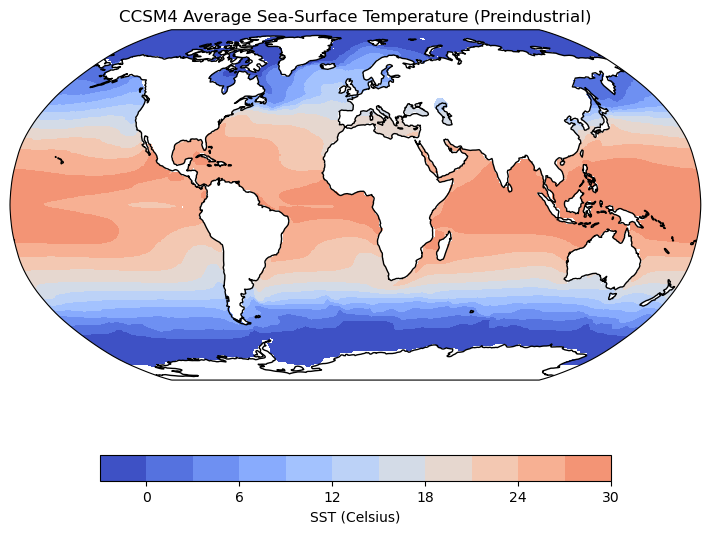

In [14]:
plot(
X = ds['lon'],
Y = ds['lat'],
Z = ds['TEMP'][0,:,:],
title = "CCSM4 Average Sea-Surface Temperature (Preindustrial)"
)